# Bike Sharing

## **Business Problem Understanding**



### **Latar Belakang**
Sistem bike-sharing telah menjadi salah satu solusi transportasi ramah lingkungan yang populer di banyak kota besar. Sistem ini memungkinkan pengguna untuk meminjam sepeda di satu lokasi dan mengembalikannya di lokasi lain. Dengan meningkatnya jumlah pengguna, pengelola sistem menghadapi tantangan untuk memastikan ketersediaan sepeda yang optimal di berbagai lokasi pada waktu yang berbeda.

Dataset bike-sharing mencatat berbagai informasi operasional, seperti jumlah sepeda yang dipinjam, kondisi cuaca, musim, dan waktu. Informasi ini sangat berguna untuk memahami pola penggunaan sepeda dan memprediksi permintaan di masa depan. Prediksi yang akurat dapat membantu pengelola untuk mengelola distribusi sepeda secara efisien.

### **Masalah Bisnis**
Stakeholder utama, yaitu pengelola sistem bike-sharing, menghadapi masalah sebagai berikut:
1. **Prediksi Permintaan Sepeda**:
   - Bagaimana memprediksi jumlah sepeda yang akan digunakan (variabel `cnt`) berdasarkan kondisi tertentu, seperti cuaca, musim, dan waktu?
   - Ketidaktepatan dalam prediksi dapat menyebabkan kekurangan atau kelebihan sepeda di beberapa lokasi.
   
2. **Efisiensi Operasional**:
   - Bagaimana data historis dapat digunakan untuk mendukung pengambilan keputusan operasional, seperti alokasi sepeda dan perencanaan strategi bisnis?

### **Tujuan Bisnis**
Tujuan dari analisis ini adalah:
1. **Prediksi Akurat**:
   - Mengembangkan model prediksi jumlah peminjaman sepeda (`cnt`) berdasarkan fitur-fitur seperti cuaca (`weathersit`), suhu (`temp`), musim (`season`), dan waktu (`hr`).
2. **Dukungan Keputusan**:
   - Memberikan wawasan berbasis data kepada pengelola sistem untuk meningkatkan efisiensi operasional dan kepuasan pelanggan.

### **Pendekatan Solusi**
1. **Pemodelan Data**:
   - Menggunakan algoritma **Random Forest Regressor** untuk memprediksi variabel target (`cnt`).
   - Algoritma ini dipilih karena mampu menangani fitur numerik dan kategorikal serta memberikan hasil yang robust terhadap data yang bervariasi.
   
2. **Evaluasi Model**:
   - Menggunakan metrik evaluasi seperti **Mean Squared Error (MSE)**, **Mean Absolute Error (MAE)**, dan **R-squared (R²)** untuk menilai performa model.
   
3. **Visualisasi**:
   - Menampilkan hubungan antara prediksi model dan data aktual untuk memahami akurasi dan pola yang diprediksi.

### **Kriteria Keberhasilan**
Keberhasilan proyek ini diukur berdasarkan:
1. **Kinerja Model**:
   - Model yang dihasilkan harus memiliki nilai MSE dan MAE yang rendah, serta nilai R² yang tinggi.
2. **Implementasi Hasil**:
   - Model harus dapat digunakan oleh pengelola sistem bike-sharing untuk mendukung pengambilan keputusan berbasis data.


## **Data Understanding**

Dataset yang digunakan berasal dari sistem bike-sharing dan mencatat berbagai atribut yang relevan untuk menganalisis dan memprediksi jumlah penggunaan sepeda. Berikut adalah tabel yang menjelaskan data dalam dataset:

| **Nama Kolom** | **Tipe Data** | **Deskripsi**                                                                                                                                              | **Contoh Nilai**          |
|-----------------|--------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------|
| `dteday`        | Date         | Tanggal pencatatan.                                                                                                                                          | 2011-01-01               |
| `season`        | Categorical  | Musim saat pencatatan: <br>1: Winter (Musim Dingin)<br>2: Spring (Musim Semi)<br>3: Summer (Musim Panas)<br>4: Fall (Musim Gugur)                             | 3                         |
| `hr`            | Integer      | Jam pencatatan (0 hingga 23).                                                                                                                                | 15                        |
| `holiday`       | Binary       | Indikator apakah hari tersebut adalah hari libur (0: Tidak, 1: Ya).                                                                                         | 0                         |
| `temp`          | Float        | Suhu yang dinormalisasi (berkisar dari 0 hingga 1, dihitung dari rentang suhu -8°C hingga 39°C).                                                             | 0.5                       |
| `atemp`         | Float        | Suhu terasa (feeling temperature) yang dinormalisasi (berkisar dari 0 hingga 1, dihitung dari rentang suhu -16°C hingga 50°C).                               | 0.6                       |
| `hum`           | Float        | Kelembapan udara yang dinormalisasi (berkisar dari 0 hingga 1).                                                                                              | 0.8                       |
| `casual`        | Integer      | Jumlah pengguna kasual (bukan anggota terdaftar).                                                                                                           | 120                       |
| `registered`    | Integer      | Jumlah pengguna terdaftar.                                                                                                                                   | 450                       |
| `cnt`           | Integer      | Jumlah total penggunaan sepeda, termasuk pengguna kasual dan terdaftar.                                                                                     | 570                       |
| `weathersit`    | Categorical  | Kondisi cuaca: <br>1: Cerah, Berawan sebagian<br>2: Berkabut + Berawan<br>3: Hujan ringan, Salju ringan<br>4: Hujan deras + Es, Salju + Kabut                | 1                         |

## Exploratory Data Analysis

In [ ]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Dataset bike-sharing dimuat menggunakan fungsi `pd.read_csv`. Proses ini memastikan data tersedia dalam bentuk DataFrame untuk analisis lebih lanjut.


In [ ]:
# Load dataset
data = pd.read_csv('data_bike_sharing.csv')

# Menampilkan sampel data
data.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857


### Distribusi Target (cnt)

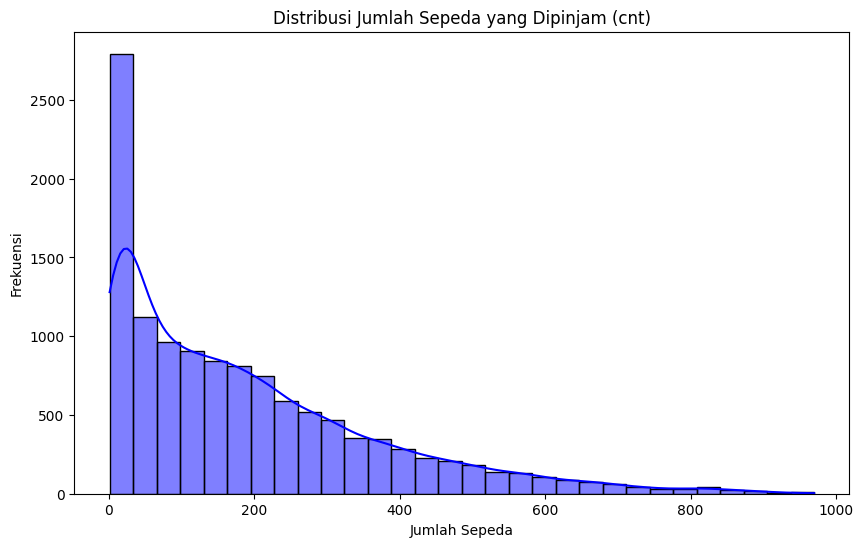

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['cnt'], kde=True, bins=30, color='blue')
plt.title('Distribusi Jumlah Sepeda yang Dipinjam (cnt)')
plt.xlabel('Jumlah Sepeda')
plt.ylabel('Frekuensi')
plt.show()

#### **Analisis**
1. **Distribusi Data**:
   - Distribusi `cnt` tampak **right-skewed** (miring ke kanan), yang berarti sebagian besar nilai `cnt` berada di kisaran yang lebih rendah (dekat dengan 0), dengan jumlah penggunaan sepeda tinggi yang lebih jarang terjadi.
   - Puncak distribusi menunjukkan bahwa jumlah peminjaman sepeda rendah (mungkin di bawah 100) sangat sering terjadi.

2. **Frekuensi Tinggi di Nilai Rendah**:
   - Banyak observasi memiliki nilai `cnt` yang sangat rendah (dekat dengan 0), menunjukkan periode dengan sedikit atau tanpa aktivitas peminjaman sepeda.

3. **Outlier Potensial**:
   - Bagian kanan distribusi menunjukkan beberapa nilai `cnt` yang sangat tinggi (di atas 800). Nilai ini dapat dianggap sebagai outlier tergantung pada konteks bisnis dan analisis lebih lanjut.


### Korelasi Antar Fitur

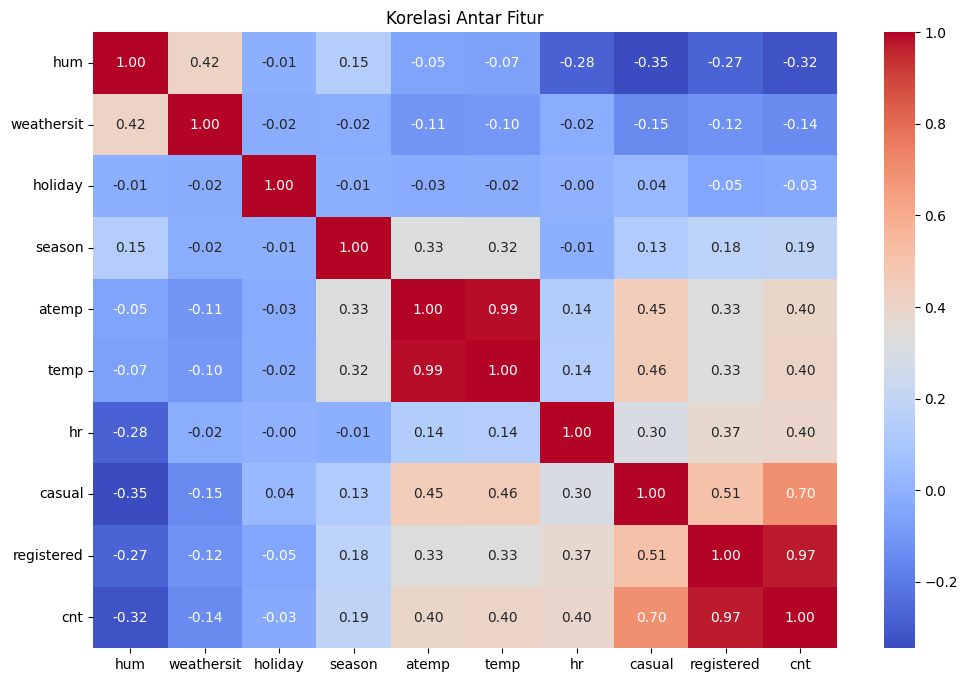

In [ ]:
plt.figure(figsize=(12, 8))
corr_matrix = data.drop(columns=['dteday'], errors='ignore').corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Korelasi Antar Fitur')
plt.show()

#### **Analisis**:
1. **Fitur Penting untuk Prediksi**:
   - `registered`, `casual`, `temp`, `atemp`, dan `hr` adalah fitur dengan korelasi tinggi terhadap `cnt`, sehingga penting untuk dimasukkan dalam model prediksi.
   
2. **Redundansi Fitur**:
   - `temp` dan `atemp` memiliki korelasi sangat tinggi, salah satu fitur dapat dihapus jika diperlukan untuk menyederhanakan model.

3. **Efek Cuaca dan Kelembapan**:
   - Kelembapan (`hum`) dan cuaca buruk (`weathersit`) memiliki dampak negatif pada jumlah sepeda yang dipinjam, tetapi dampaknya tidak sebesar fitur utama lainnya.


### Distribusi Fitur Kategorial

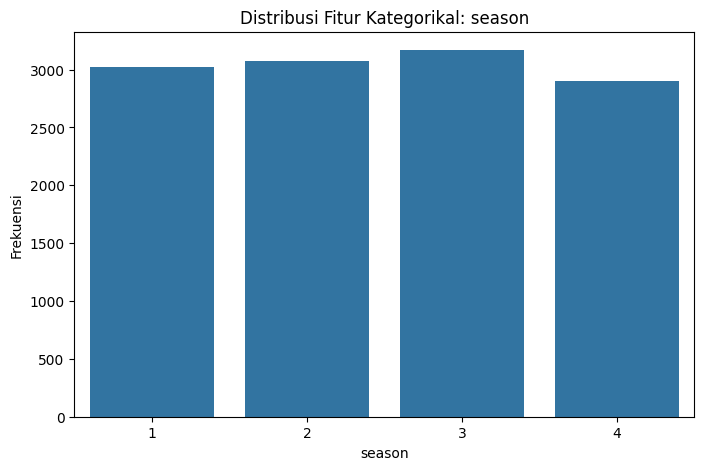

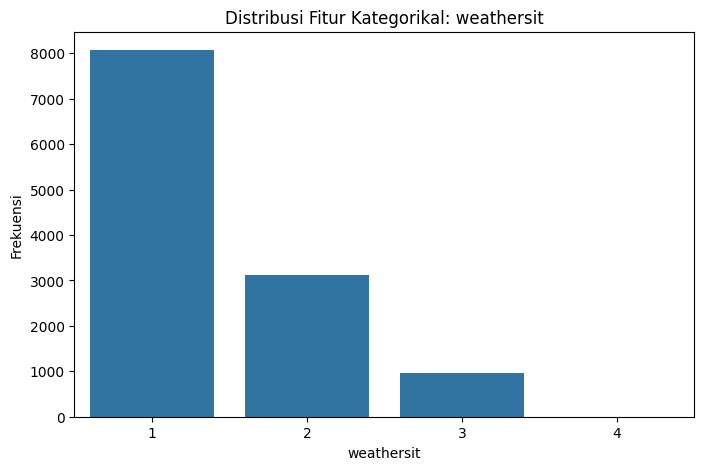

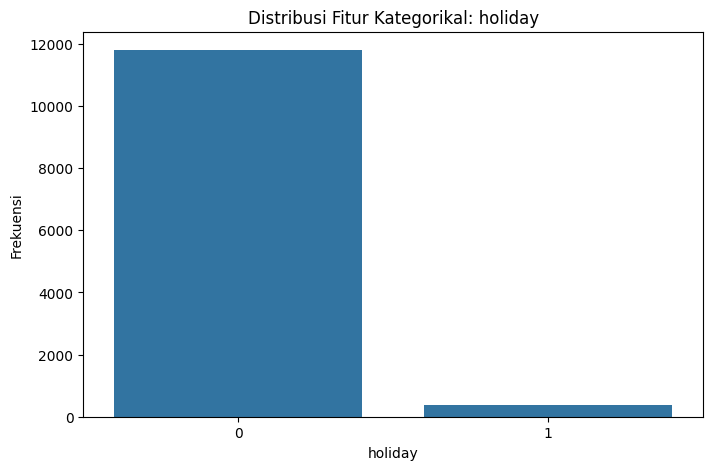

In [ ]:
categorical_features = ['season', 'weathersit', 'holiday']
for feature in categorical_features:
  plt.figure(figsize=(8, 5))
  sns.countplot(data=data, x=feature)
  plt.title(f'Distribusi Fitur Kategorikal: {feature}')
  plt.xlabel(feature)
  plt.ylabel('Frekuensi')
  plt.show()

#### Analisis

1. **Distribusi `season`**:
   - Semua musim memiliki distribusi data yang hampir merata.
   - Musim panas (`season=3`) sedikit mendominasi, kemungkinan karena cuaca yang mendukung penggunaan sepeda.
   - Tidak ada bias signifikan terhadap satu musim tertentu.

2. **Distribusi `weathersit`**:
   - Mayoritas observasi berada pada kategori `1` (Cerah), diikuti oleh `2` (Berkabut).
   - Sangat sedikit data pada kategori `3` (Hujan Ringan/Salju) dan hampir tidak ada pada kategori `4` (Hujan Deras/Salju Tebal).
   - Dataset cenderung bias terhadap kondisi cuaca baik.

3. **Distribusi `holiday`**:
   - Sebagian besar data berasal dari hari kerja (`holiday=0`), dengan jumlah data yang sangat kecil pada hari libur (`holiday=1`).
   - Analisis penggunaan sepeda pada hari libur mungkin kurang representatif karena sedikitnya observasi.

# Hubungan Antara Fitur Numerik dan Target (cnt)

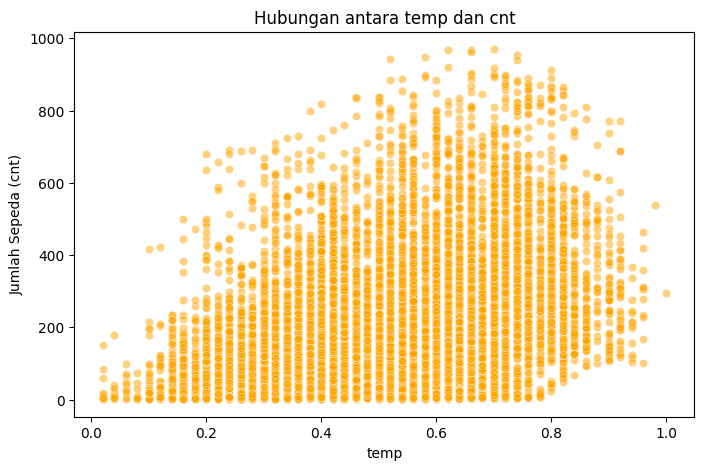

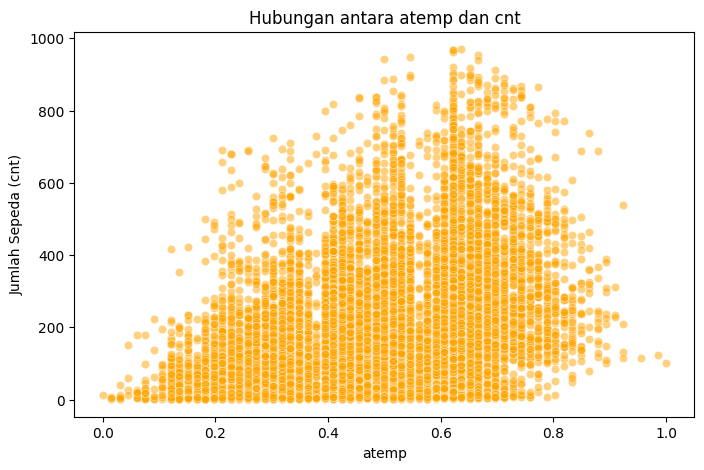

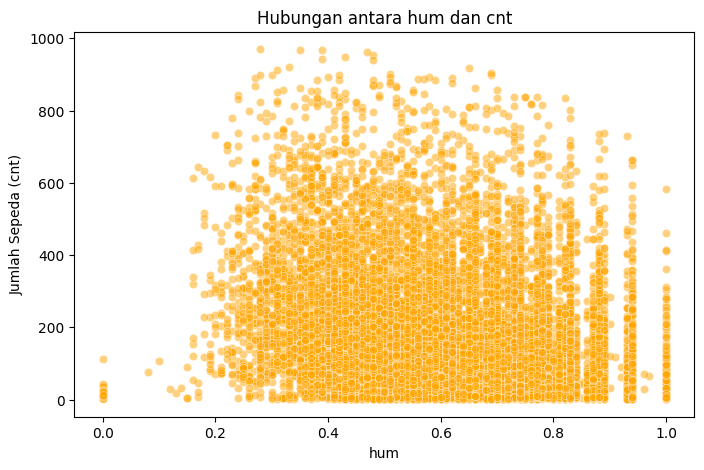

In [ ]:
numeric_features = ['temp', 'atemp', 'hum']
for feature in numeric_features:
  plt.figure(figsize=(8, 5))
  sns.scatterplot(data=data, x=feature, y='cnt', alpha=0.5, color='orange')
  plt.title(f'Hubungan antara {feature} dan cnt')
  plt.xlabel(feature)
  plt.ylabel('Jumlah Sepeda (cnt)')
  plt.show()

#### Analisis

1. **Hubungan `temp` dan `cnt`**:
   - Semakin tinggi suhu (`temp`), jumlah sepeda yang dipinjam (`cnt`) meningkat hingga suhu nyaman (0.6-0.7), lalu menurun pada suhu yang sangat tinggi.
   - Hubungan **positif moderat** dan non-linear.

2. **Hubungan `atemp` dan `cnt`**:
   - Mirip dengan `temp`, jumlah peminjaman sepeda meningkat hingga puncak pada `atemp` 0.6-0.7, lalu menurun.
   - Hubungan juga **positif moderat**, menunjukkan pola yang sangat mirip dengan `temp`.

3. **Hubungan `hum` dan `cnt`**:
   - Tidak ada pola yang jelas; jumlah peminjaman sedikit menurun pada kelembapan (`hum`) sangat tinggi (>0.8).
   - Hubungan **negatif lemah** dibandingkan `temp` dan `atemp`.

## Data Preprocessing

### Stuktur Data

In [ ]:
print("Informasi Awal Data:")
print(data.info())

Informasi Awal Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      12165 non-null  object 
 1   hum         12165 non-null  float64
 2   weathersit  12165 non-null  int64  
 3   holiday     12165 non-null  int64  
 4   season      12165 non-null  int64  
 5   atemp       12165 non-null  float64
 6   temp        12165 non-null  float64
 7   hr          12165 non-null  int64  
 8   casual      12165 non-null  int64  
 9   registered  12165 non-null  int64  
 10  cnt         12165 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 1.0+ MB
None


### Pengecekan Nilai Hilang

In [ ]:
print("Cek nilai yang hilang:")
print(data.isnull().sum())

Cek nilai yang hilang:
dteday        0
hum           0
weathersit    0
holiday       0
season        0
atemp         0
temp          0
hr            0
casual        0
registered    0
cnt           0
dtype: int64


### Penghapusan Nilai Duplikat

In [ ]:
data = data.drop_duplicates()

print("Data setelah menghapus duplikat:")
print(data.shape)

Data setelah menghapus duplikat:
(12165, 11)


### Penghapusan Kolom Tidak Relevan

Kolom `dteday` (tanggal pencatatan) dihapus karena dianggap tidak relevan dalam proses prediksi jumlah peminjaman sepeda (`cnt`).

In [ ]:
columns_to_drop = ['dteday']
data = data.drop(columns=columns_to_drop)

data.head()

,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,0.55,1,0,3,0.6970,0.76,18,99,758,857


### Penyesuaian Fitur Kategorikal

Beberapa kolom seperti `season`, `weathersit`, dan `holiday` merupakan fitur kategorikal yang perlu diubah menjadi representasi numerik agar dapat digunakan oleh algoritma machine learning.

In [ ]:
data['season'] = data['season'].astype('category')
data['weathersit'] = data['weathersit'].astype('category')
data['holiday'] = data['holiday'].astype('category')

data.head()

,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,0.55,1,0,3,0.6970,0.76,18,99,758,857


### Pembagian Data Latih & Uji

Dataset dibagi menjadi dua bagian:
- **Data latih** (80%) untuk melatih model.
- **Data uji** (20%) untuk menguji performa model.

Pembagian ini dilakukan dengan fungsi `train_test_split`.

Fitur numerik diubah agar memiliki distribusi dengan rata-rata 0 dan standar deviasi 1 menggunakan StandardScaler. Ini membantu algoritma machine learning bekerja lebih efisien dengan data yang memiliki skala yang konsisten.

In [ ]:
# Memisahkan fitur (X) dan target (y)
X = data.drop(columns=['cnt'])  # Fitur (variabel independen)
y = data['cnt']  # Variabel target

# Membagi data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarisasi fitur numerik setelah split data
scaler = StandardScaler()

# Fit scaler hanya pada data latih untuk menghindari data leakage
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=['float64', 'int64']))
X_test_scaled = scaler.transform(X_test.select_dtypes(include=['float64', 'int64']))

# Menggabungkan kembali data kategorikal dengan data numerik yang telah distandarisasi
X_train_processed = pd.concat([
    pd.DataFrame(X_train_scaled, columns=X_train.select_dtypes(include=['float64', 'int64']).columns, index=X_train.index),
    X_train.select_dtypes(include=['category'])
], axis=1)

X_test_processed = pd.concat([
    pd.DataFrame(X_test_scaled, columns=X_test.select_dtypes(include=['float64', 'int64']).columns, index=X_test.index),
    X_test.select_dtypes(include=['category'])
], axis=1)

# Menampilkan ukuran dataset setelah preprocessing
print("Ukuran data setelah preprocessing:")
print(f"X_train: {X_train_processed.shape}, X_test: {X_test_processed.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")

Ukuran data setelah preprocessing:
X_train: (9732, 9), X_test: (2433, 9), y_train: (9732,), y_test: (2433,)


## Modelling & Evaluation

`RandomForestRegressor` adalah algoritma regresi berbasis ensemble yang terdiri dari sejumlah pohon keputusan (**decision trees**) yang digabungkan untuk menghasilkan prediksi rata-rata. Model ini bekerja dengan membagi data ke beberapa pohon, melatih setiap pohon secara independen, dan kemudian menggabungkan hasil dari semua pohon untuk prediksi akhir.

#### **Keunggulan Random Forest:**
1. **Robust terhadap overfitting**: Karena menggabungkan prediksi dari banyak pohon, model ini lebih tahan terhadap overfitting dibandingkan dengan pohon keputusan tunggal.
2. **Dapat menangani data dengan banyak fitur**: Model ini bekerja baik dengan data yang memiliki fitur numerik maupun kategorikal.
3. **Mampu menangani hubungan non-linear**: Model ini cocok untuk dataset yang memiliki hubungan kompleks antar fitur.
4. **Fitur penting otomatis**: Memberikan informasi tentang pentingnya setiap fitur dalam memprediksi target.

### **Parameter yang Digunakan**
#### **1. `n_estimators=100`**
- **Apa**: Jumlah pohon keputusan (decision trees) dalam hutan.
- **Mengapa**:
  - Nilai default biasanya 100.
  - Semakin banyak pohon, semakin stabil prediksi model, tetapi waktu komputasi meningkat.
  - Pada `n_estimators=100`, model biasanya memiliki keseimbangan yang baik antara akurasi dan kecepatan.

#### **2. `random_state=42`**
- **Apa**: Seed untuk memastikan replikasi hasil.
- **Mengapa**:
  - Dengan menetapkan `random_state`, proses acak seperti pemilihan data untuk setiap pohon menjadi deterministik, sehingga hasil yang sama dapat diperoleh setiap kali model dilatih.

In [ ]:
# Modelling
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_processed, y_train)

# Predictions
y_pred = model.predict(X_test_processed)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R2 Score: {r2}")

Evaluation Metrics:
Mean Absolute Error (MAE): 1.029991779695849
Mean Squared Error (MSE): 9.416656432387999
Root Mean Squared Error (RMSE): 3.0686571057040566
R2 Score: 0.9996978495753359


#### **Analisis**

1. **MAE (1.03)**: Rata-rata kesalahan prediksi adalah **1 unit sepeda**, menunjukkan prediksi sangat akurat.

2. **MSE (9.42)**: Nilai kesalahan kuadrat rata-rata, digunakan untuk menghitung RMSE.

3. **RMSE (3.07)**: Rata-rata prediksi model meleset sekitar **3 unit sepeda**, kesalahan kecil dibandingkan skala target.

4. **R² Score (0.9997)**: Model menjelaskan hampir **100% variabilitas data**, menunjukkan performa yang sangat kuat.

Model **RandomForestRegressor** sangat akurat dan cocok untuk memprediksi jumlah sepeda yang dipinjam dengan kesalahan prediksi yang sangat kecil.

### Fitur Data Penting

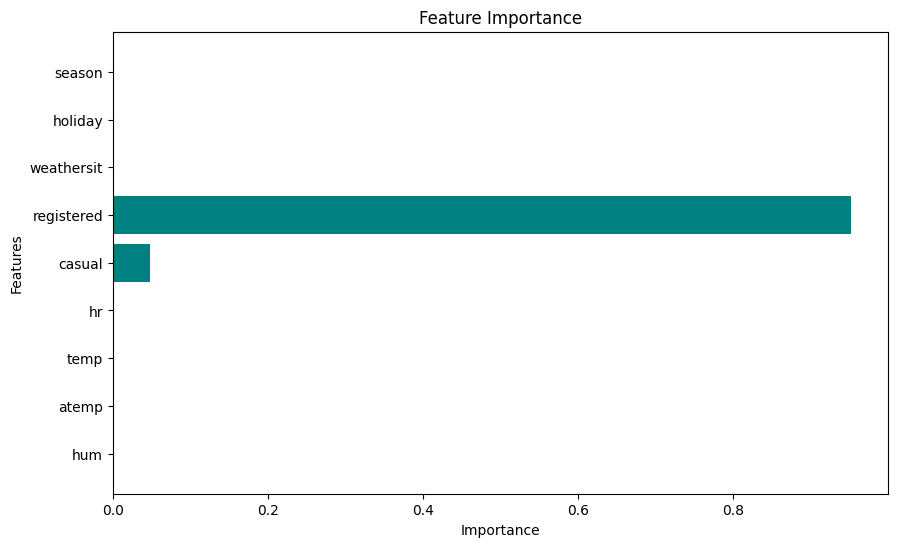

In [ ]:
# Feature Importance
importance = model.feature_importances_
feature_names = X_train_processed.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance, color='teal')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

#### **Analisis**

1. **Fokus Utama**: Model mengandalkan data pengguna terdaftar (`registered`) untuk prediksi, menunjukkan hubungan yang sangat kuat dengan target (`cnt`).

2. **Optimalisasi Data**: Fitur-fitur dengan kontribusi rendah (seperti `season`, `holiday`, dll) mungkin dapat diabaikan tanpa memengaruhi performa model secara signifikan, tergantung pada kebutuhan analisis.

3. **Penggunaan Bisnis**: Data pengguna terdaftar (`registered`) adalah kunci utama untuk mengoptimalkan prediksi jumlah sepeda yang dipinjam.

### Jumlah Actual vs Predicted

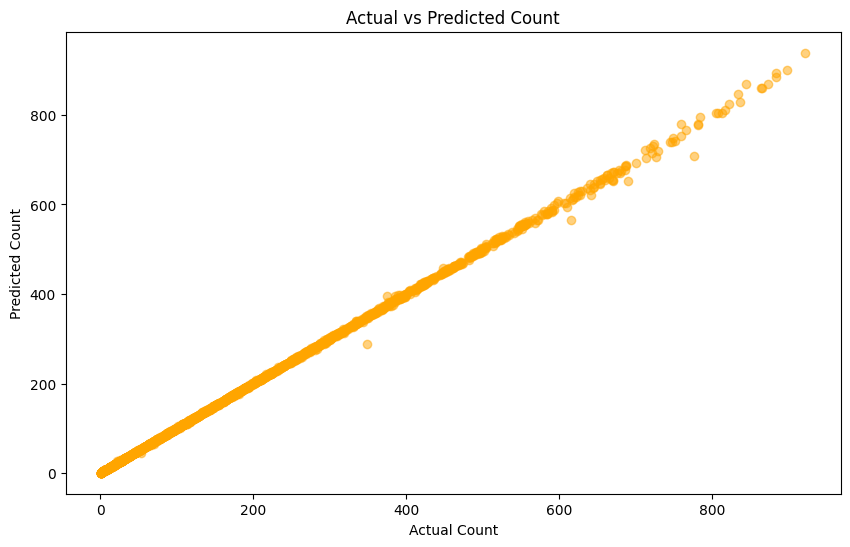

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='orange')
plt.xlabel('Actual Count')
plt.ylabel('Predicted Count')
plt.title('Actual vs Predicted Count')
plt.show()

#### **Analisis**:
1. **Performa Model Sangat Baik**:
   - Prediksi model hampir sempurna dengan kesalahan yang sangat kecil.
   - Grafik ini sejalan dengan metrik evaluasi seperti **R² Score = 0.9997**, yang menunjukkan kemampuan model dalam menjelaskan variabilitas data.

2. **Validasi Model**:
   - Meskipun hasilnya sangat baik, penting untuk memvalidasi model pada dataset yang berbeda untuk memastikan model tidak overfitting.

3. **Potensi Penggunaan**:
   - Model ini dapat digunakan secara andal untuk memprediksi jumlah sepeda yang dipinjam dalam berbagai kondisi.

## **Conclusion**

1. **Model Performance**:
   - Model **RandomForestRegressor** yang digunakan memiliki performa sangat baik, dengan **R² Score = 0.9997**, menunjukkan bahwa hampir semua variabilitas data berhasil dijelaskan oleh model.
   - Kesalahan prediksi rata-rata sangat kecil:
     - **MAE**: 1.03 (rata-rata kesalahan sebesar 1 unit sepeda).
     - **RMSE**: 3.07 (kesalahan rata-rata sekitar 3 unit sepeda).
   - Prediksi model hampir identik dengan nilai aktual, seperti yang terlihat dari grafik **Actual vs Predicted**.

2. **Feature Importance**:
   - Fitur **`registered`** (pengguna terdaftar) memiliki kontribusi terbesar terhadap prediksi jumlah sepeda yang dipinjam.
   - Fitur **`casual`** (pengguna kasual) juga memiliki kontribusi moderat.
   - Fitur lainnya, seperti `season`, `holiday`, dan `weathersit`, memiliki pengaruh yang jauh lebih kecil terhadap prediksi.

3. **Data Insights**:
   - Penggunaan sepeda cenderung lebih tinggi pada suhu yang nyaman (diwakili oleh `temp` dan `atemp`).
   - Faktor kelembapan (`hum`) dan kondisi cuaca (`weathersit`) memiliki dampak kecil terhadap jumlah peminjaman sepeda.

## **Recommendation**

1. **Optimalisasi Pengelolaan Sepeda**:
   - Fokus pada data pengguna terdaftar (`registered`) untuk meningkatkan prediksi permintaan dan optimalisasi distribusi sepeda.
   - Memanfaatkan hasil prediksi model untuk memastikan sepeda tersedia di lokasi-lokasi dengan permintaan tinggi.

2. **Strategi Berdasarkan Cuaca**:
   - Meskipun dampak cuaca kecil, promosi dapat difokuskan pada periode dengan cuaca yang kurang mendukung (seperti kelembapan tinggi atau kondisi berkabut) untuk meningkatkan penggunaan sepeda.

3. **Validasi Model**:
   - Uji model pada dataset baru atau periode waktu yang berbeda untuk memastikan generalisasi hasil dan menghindari overfitting.

4. **Feature Engineering**:
   - Pertimbangkan penghapusan fitur dengan kontribusi rendah, seperti `holiday` atau `season`, untuk menyederhanakan model tanpa mengurangi performa secara signifikan.

5. **Implementasi Operasional**:
   - Gunakan model ini sebagai alat pendukung keputusan untuk manajemen inventori sepeda, alokasi, dan strategi promosi di berbagai musim atau kondisi cuaca.

In [ ]:
git init